In [1]:
import pandas as pd
import sys
import numpy as np
from numpy.linalg import inv
import json

sys.path.append('../')

import data_generation

In [31]:
with open('Examples_data/SP500.json', 'r') as f:
    stock_dict = json.load(f)

inverse_stock_dict = {value: key for key, value in stock_dict.items()}

data = pd.read_csv('Examples_data/finance.csv', header=None)  
data.columns = [inverse_stock_dict.get(i, f"Unnamed_{i}") for i in range(len(data.columns))] 

data.head()


,A,AA,AAPL,ABC,ABT,ACE,ACS,ADBE,ADI,ADM,...,XL,XLNX,XOM,XRAY,XRX,XTO,YHOO,YUM,ZION,ZMH
0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,-0.23,-1.15,-0.13,-1.22,1.49,0.0,0.58,-0.37,-0.67,-1.01,...,3.64,-0.44,1.94,0.14,1.27,-0.42,1.32,-2.45,-3.60,1.49
2,-0.94,-0.88,-0.11,0.31,-0.66,0.0,-0.56,-0.50,0.14,-2.61,...,2.86,-0.99,-1.19,0.32,1.55,-3.94,0.22,-0.26,-0.37,0.06
3,0.51,-0.77,-1.22,-0.19,0.28,0.0,-0.04,-0.53,0.91,0.53,...,0.13,0.05,0.93,-1.11,-0.04,-0.15,-0.97,-0.44,-0.84,0.81
4,-0.15,0.75,0.83,0.81,0.78,0.0,-1.51,-0.54,-0.56,0.72,...,-1.16,-0.79,-1.10,-0.97,0.99,-1.80,-0.39,-0.76,-0.27,-0.37


In [39]:
data.mean().max()

0.3781224489795919

In [40]:
stocks=['AAPL','GOOG','AMZN','INTC','BA','FDX']

In [41]:
data_stocks=data[stocks].copy()

In [42]:
data_stocks=data_stocks.iloc[85:147]

In [43]:
data_stocks.reset_index(drop=True,inplace=True)

In [44]:
data_stocks

,AAPL,GOOG,AMZN,INTC,BA,FDX
0,0.71,0.70,-0.30,0.22,-0.37,-0.88
1,0.06,-0.40,-1.96,0.86,2.29,-1.50
2,0.29,-0.33,0.70,0.06,3.39,1.42
3,-1.61,-2.54,-1.83,-0.35,3.02,-0.84
4,-0.50,-2.64,-2.02,-1.28,3.73,-1.40
...,...,...,...,...,...,...
57,-1.23,0.95,5.18,-0.40,0.19,0.73
58,1.79,-0.12,0.16,-0.58,0.05,0.37
59,0.23,-0.46,-0.37,-0.01,1.67,0.54
60,1.38,0.65,0.97,-0.06,-0.89,0.53


In [45]:
data_stocks.mean()

AAPL    0.134516
GOOG   -0.191452
AMZN   -0.042258
INTC    0.089677
BA      0.417258
FDX     0.110968
dtype: float64

In [46]:
n=5
T=12
chunk_size = 62 // T

data_splits = []
for i in range(T):
    start = i * chunk_size
    end = (i+1) * chunk_size
    data_splits.append(data_stocks.iloc[start:end])

In [47]:
S = []
n_list = []
for i in range(T):
    segment = data_splits[i]
    n_i = segment.shape[0]
    n_list.append(n_i)
    # Empirical covariance. Use rowvar=False so each column is a variable
    cov_i = np.cov(segment, rowvar=False)
    S.append(cov_i)

In [49]:
len(S)

12

In [52]:
from tvgl_solver import *

lambda_ = 0.01  # L1 regularization (sparsity)
beta = 1     # Smoothness regularization
Thetas_estimated =solve_time_varying_graphical_lasso(
    S=S,
    n_list=n_list,
    lambda_=lambda_,
    beta=beta,
    penalty_function=perturbed_node,
    p=6,
    T=T
)

                                     CVXPY                                     
                                     v1.5.3                                    
(CVXPY) Jan 18 10:45:11 PM: Your problem has 828 variables, 828 constraints, and 0 parameters.
(CVXPY) Jan 18 10:45:11 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 18 10:45:11 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 18 10:45:11 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 18 10:45:11 PM: Your problem is compiled with the CPP canonicalization backend.


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jan 18 10:45:11 PM: Compiling problem (target solver=SCS).
(CVXPY) Jan 18 10:45:11 PM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 18 10:45:11 PM: Applying reduction FlipObjective
(CVXPY) Jan 18 10:45:11 PM: Applying reduction Dcp2Cone
(CVXPY) Jan 18 10:45:11 PM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 18 10:45:11 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 18 10:45:11 PM: Applying reduction SCS
(CVXPY) Jan 18 10:45:11 PM: Finished problem compilation (took 2.558e-01 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
------------------------------------

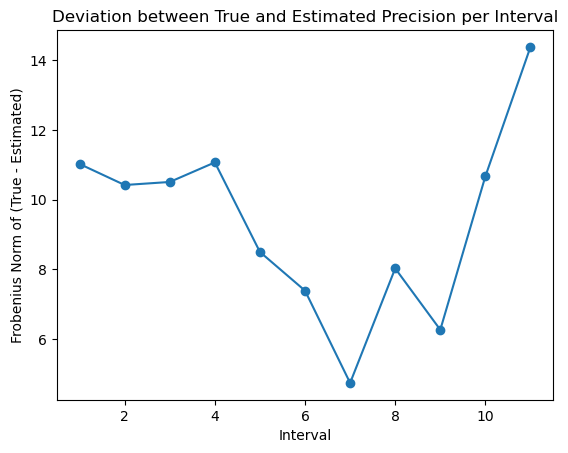

In [53]:
import matplotlib.pyplot as plt
deviations=[np.linalg.norm(Thetas_estimated[i] - Thetas_estimated[i-1], ord='fro') for i in range(1, len(Thetas_estimated))]
plt.plot(range(1, T), deviations, marker='o')
plt.xlabel("Interval")
plt.ylabel("Frobenius Norm of (True - Estimated)")
plt.title("Deviation between True and Estimated Precision per Interval")
plt.show()